# **1. Perkenalan Dataset**


Dataset yang saya gunakan dalam proyek ini adalah Students Performance in Exams yang diambil dari Kaggle (https://www.kaggle.com/datasets/spscientist/students-performance-in-exams). Dataset ini berisi data hasil ujian siswa di beberapa mata pelajaran beserta informasi demografi dan latar belakang pendidikan orang tua.

Dataset ini memiliki 8 kolom utama, yaitu:

- gender: jenis kelamin siswa (male/female)
- race/ethnicity: kelompok etnis siswa (contoh: group A, group B, dst)
- parental level of education: tingkat pendidikan orang tua siswa
- lunch: jenis layanan makan siang yang diterima siswa (standard/reduced)
- test preparation course: apakah siswa mengikuti kursus persiapan ujian (completed/none)
- math score: nilai matematika siswa (0-100)
- reading score: nilai membaca siswa (0-100)
- writing score: nilai menulis siswa (0-100)

Dataset ini terdiri dari sekitar 1000 baris data, di mana setiap baris merepresentasikan satu siswa dan nilai-nilai yang diperolehnya pada ujian.

Dataset ini sangat berguna untuk menganalisis faktor-faktor yang memengaruhi performa akademik siswa serta membangun model prediksi nilai ujian berdasarkan informasi demografi dan kebiasaan belajar.

# **2. Import Library**

Tahap ini mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [ ]:
# Import library dasar untuk manipulasi data dan visualisasi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk preprocessing dan machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Library tambahan untuk eksplorasi
import missingno as msno

# Supaya grafik langsung tampil di notebook
%matplotlib inline


# **3. Memuat Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/dicoding/msml/students_performance.csv'
df = pd.read_csv(file_path)

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
print(f'Dataset memiliki {df.shape[0]} baris dan {df.shape[1]} kolom.\n')

df.info()

Dataset memiliki 1000 baris dan 8 kolom.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini dilakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## 1. Statistik Deskriptif

In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


- Math score: Nilai berkisar antara 0 hingga 100 dengan rata-rata sekitar 66.
- Reading score: Rata-rata lebih tinggi dibanding math, sekitar 70.
- Writing score: Hampir serupa dengan reading score, rata-rata sekitar 69.
- Nilai matematika cenderung sedikit lebih rendah dibanding kemampuan membaca dan menulis.

## 2. Cek Missing Values

In [ ]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


Tidak ditemukan missing values.

## 3. Cek Duplikasi

In [ ]:
df.duplicated().sum()

np.int64(0)

Tidak ada baris duplikat.

## 4. Distribusi Skor Siswa

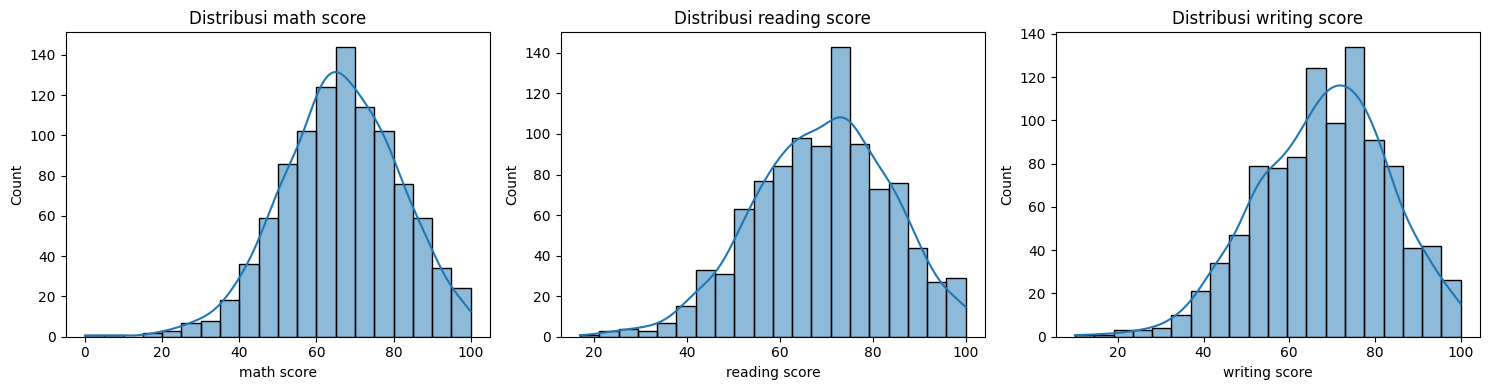

In [ ]:
# Plot distribusi skor
plt.figure(figsize=(15, 4))
for i, subject in enumerate(['math score', 'reading score', 'writing score']):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[subject], kde=True, bins=20)
    plt.title(f'Distribusi {subject}')
plt.tight_layout()
plt.show()


- Distribusi math score terlihat lebih menyebar dan cenderung normal, meski ada sedikit skew ke kiri.
- Reading dan writing scores memiliki distribusi yang mirip, cenderung simetris.
- Distribusi skor cukup normal, cocok untuk model-model statistik seperti regresi atau klasifikasi jika dilakukan binning.

## 5. Korelasi Antar Skor

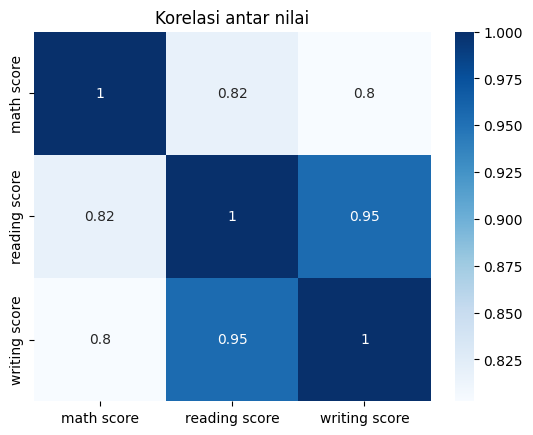

In [ ]:
scores = df[['math score', 'reading score', 'writing score']]
sns.heatmap(scores.corr(), annot=True, cmap='Blues')
plt.title('Korelasi antar nilai')
plt.show()

Terdapat korelasi kuat antara:
- Reading score dan Writing score (sekitar 0.95)
- Math score juga berkorelasi baik dengan dua skor lainnya (sekitar 0.8)
- Siswa yang bagus di satu bidang cenderung bagus di bidang lain. Sehingga fitur-fitur ini bisa saling mendukung dalam prediksi.



## 6. Rata-rata Nilai Berdasarkan Gender

<Figure size 1000x400 with 0 Axes>

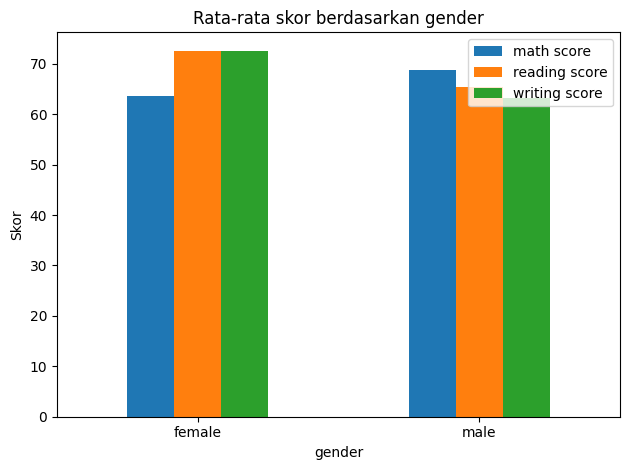

In [ ]:
plt.figure(figsize=(10, 4))
mean_scores = df.groupby('gender')[['math score', 'reading score', 'writing score']].mean()
mean_scores.plot(kind='bar')
plt.title('Rata-rata skor berdasarkan gender')
plt.ylabel('Skor')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

- Perempuan cenderung memiliki skor reading dan writing yang lebih tinggi.
- Laki-laki memiliki skor math sedikit lebih tinggi dari perempuan.
- Ada perbedaan skor antar gender berdasarkan jenis mata pelajaran. Bisa jadi fitur gender berpengaruh terhadap hasil prediksi nilai.

## 7. Pengaruh Test Preparation Course

<Figure size 1000x400 with 0 Axes>

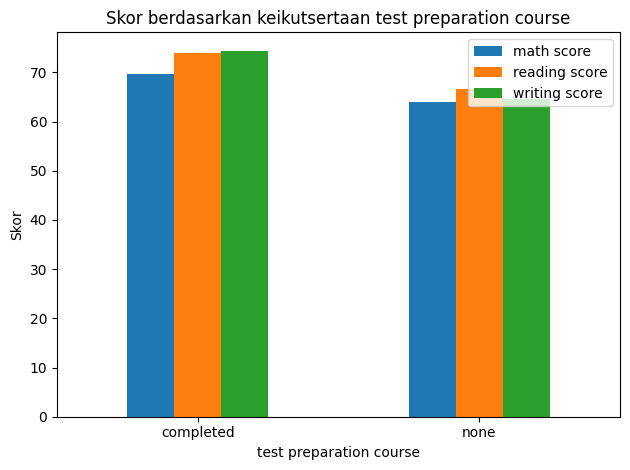

In [ ]:
plt.figure(figsize=(10, 4))
prep_scores = df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean()
prep_scores.plot(kind='bar')
plt.title('Skor berdasarkan keikutsertaan test preparation course')
plt.ylabel('Skor')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

- Siswa yang mengikuti test preparation course secara konsisten memiliki nilai lebih tinggi di semua mata pelajaran.
- Fitur test preparation course merupakan indikator kuat terhadap performa akademik. Sangat layak dipertimbangkan sebagai variabel penting dalam modeling.

Karena skor terdiri dari tiga jenis nilai, ada beberapa pendekatan yang bisa diambil:

- Regresi: memprediksi skor (misalnya, math score).
- Klasifikasi: klasifikasikan siswa ke dalam kategori performa (rendah/sedang/tinggi) berdasarkan skor gabungan.

Proyek akan mengklasifikasikan performa siswa ke dalam beberapa kategori berdasarkan skor, karena:

- Klasifikasi lebih mudah dikomunikasikan.
- Lebih sesuai untuk sistem monitoring dan alerting.
- Mudah dijadikan basis model pipeline dan di-deploy ke MLflow dan Grafana.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

## 5.1 Menangani Missing Values

In [ ]:
print(df.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


Karena data tidak memiliki missing values, maka tidak dilakukan penanganan apapun.

## 5.2 Menangani Duplikasi

In [ ]:
print(f"Jumlah data duplikat: {df.duplicated().sum()}")
df = df.drop_duplicates()

Jumlah data duplikat: 0


Karena data tidak memiliki duplikasi data, maka tidak dilakukan penanganan apapun.

## 5.3 Menghitung Skor Gabungan

Menghitung rata-rata dari `math score`, `reading score`, dan `writing score` untuk membentuk fitur baru bernama `average_score`.

Hal ini dilakukan karena dataset punya 3 skor terpisah (math score, reading score, dan writing score) yang menggambarkan performa siswa secara berbeda-beda.
Supaya lebih sederhana dan efektif, kita gabungkan ketiganya menjadi satu skor rata-rata (average_score). Ini akan menjadi ukuran kinerja keseluruhan siswa agar mempermudah klasifikasi dengan satu target kinerja, bukan 3 target yang berbeda.

In [ ]:
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

Label klasifikasi `performance_level` berdasarkan kriteria:

A : 85–100 → Sangat Baik

B : 75–84 → Baik

C : 60–74 → Cukup

D : 50–59 → Kurang

E : 0–49 → Sangat Kurang

In [ ]:
def score_to_grade(score):
    if score >= 85:
        return 'A'
    elif score >= 75:
        return 'B'
    elif score >= 60:
        return 'C'
    elif score >= 50:
        return 'D'
    else:
        return 'E'

df['performance_level'] = df['average_score'].apply(score_to_grade)

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score,performance_level
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,C
1,female,group C,some college,standard,completed,69,90,88,82.333333,B
2,female,group B,master's degree,standard,none,90,95,93,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,E
4,male,group C,some college,standard,none,76,78,75,76.333333,B


##  5.4 Encoding Fitur Kategorikal

Model machine learning tidak dapat langsung memproses data non-numerik seperti gender atau tingkat pendidikan orang tua. Encoding (OneHotEncoding) mengubah data kategori menjadi format numerik yang bisa dimengerti model. Tahap ini memproses fitur kategori menjadi bentuk numerik agar dapat digunakan oleh algoritma klasifikasi.

In [ ]:
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
df_encoded = pd.get_dummies(df, columns=categorical_cols)

## 5.5 Memisahkan Fitur dan Target

Untuk melatih model, data dipisahkan menjadi fitur input (X) dan label target (y).
Target (performance_level) tidak boleh termasuk dalam fitur.

In [ ]:
X = df_encoded.drop(['math score', 'reading score', 'writing score', 'average_score', 'performance_level'], axis=1)
y = df_encoded['performance_level']

## 5.6 Split Data

Untuk mengevaluasi performa model secara adil, data dibagi menjadi data latih dan data uji (test). Ini mencegah model hanya "menghapal" data latih tapi gagal prediksi data baru.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## 5.7 Standarisasi Fitur

Beberapa algoritma machine learning sensitif terhadap skala fitur. Standarisasi membuat fitur memiliki rata-rata 0 dan standar deviasi 1, sehingga model dapat belajar lebih efisien. Standarisasi akan menormalkan data agar pelatihan model menjadi lebih stabil dan cepat konvergen.

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 6. Export Data

In [23]:
df_encoded.to_csv('/content/students_performance_preprocessed_manual.csv', index=False)